In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
import glob
import geopandas

import buildtools as bt

# Read a single file as points

In [3]:
df = bt.read_blickfeld_log('object_list_1674494142583.json')
df.head()

,uuid,timestamp,pose.position.x,pose.position.y,pose.position.z,pose.orientation.x,pose.orientation.y,pose.orientation.z,pose.orientation.w,linearVelocity.x,...,shape.pose.position.y,shape.pose.position.z,shape.pose.orientation.x,shape.pose.orientation.y,shape.pose.orientation.z,shape.pose.orientation.w,shape.box.dimensions.x,shape.box.dimensions.y,shape.box.dimensions.z,geometry
0,39b99482-cc81-454d-8b25-7b86854dd258,2023-01-23T17:15:41.792557669Z,29.952789,25.005157,0,0,0,0.925178,-0.379533,-0.469192,...,24.933634,-0.086946,0,0,0.968258,-0.249954,0.845836,0.578575,0.123493,POINT (29.95279 25.00516)
1,6bf7f61d-2532-493b-b566-4472c10afd7c,2023-01-23T17:15:41.792557669Z,28.839567,16.688398,0,0,0,0.139417,0.990234,1.159414,...,16.706322,0.791576,0,0,-0.649260,0.760566,0.711363,0.975831,1.511247,POINT (28.83957 16.68840)
2,c35ebc1e-877d-47c4-9c6e-91a566456f6a,2023-01-23T17:15:41.792557669Z,3.119906,8.426128,0,0,0,0.918900,-0.394489,-0.217489,...,8.409618,0.011951,0,0,0.627001,0.779018,0.489891,0.096131,0.079479,POINT (3.11991 8.42613)
3,23eca0b8-d7b6-41df-b05b-5d14b4d33271,2023-01-23T17:15:41.792557669Z,0.526950,8.479430,0,0,0,-0.487460,0.873145,0.017597,...,8.451666,0.028058,0,0,0.957063,0.289880,0.654582,0.422244,0.128641,POINT (0.52695 8.47943)
4,58d35268-7c4f-4377-9653-877658d51c13,2023-01-23T17:15:41.792557669Z,13.388733,5.508290,0,0,0,0.867900,0.496739,-0.251173,...,3.711981,0.588715,0,0,0.549373,0.835577,0.000000,0.000000,0.000000,POINT (13.38873 5.50829)


<AxesSubplot:>

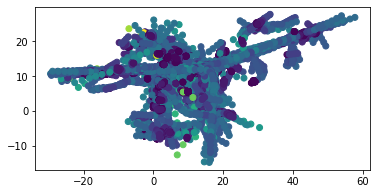

In [6]:
df['linearVelocity'] = (df['linearVelocity.x']**2 + df['linearVelocity.y']**2)**.5
df.plot(column='linearVelocity')

# Read a single file as a line

fail
fail
fail
fail


<AxesSubplot:>

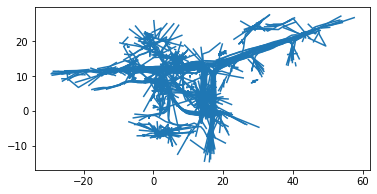

In [8]:
df = bt.read_blickfeld_log('object_list_1674494142583.json',geometry='line')
df.plot()

# Write out the data with a Building Coordinate Reference System (BCRS)

In [73]:
fn = 'object_list_1674494142583.json'

df = bt.read_blickfeld_log(fn,geometry='line')

# These are defined by the coordinate system of your space; the origin and rotation.
lat,lon,rotation = 37.227546,-80.41708,-31
crs = bt.make_bcrs(lat,lon,rotation,'cid_bcrs',method='aeqd')

df.to_file('out/' + fn + '.shp',crs=crs)

fail
fail
fail
fail


C:\Users\thoma\AppData\Local\Temp\ipykernel_5124\1323299147.py:9: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df.to_file('out/' + fn + '.shp',crs=crs)


# Read multiple files and aggregate

In [75]:
fns = glob.glob('N:\Projects\BUILD\percept_logs\*.json')
fns = fns[500:520]

df = pd.concat([bt.read_blickfeld_log(fn) for fn in fns])
df_lines = bt.points_to_lines(df)

<AxesSubplot:>

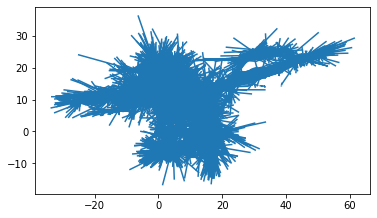

In [76]:
df_lines.plot()

# Make a vector plot

In [77]:
df = df.dropna()
x,y,u,v = df['pose.position.x'].values,df['pose.position.y'].values, \
          df['linearVelocity.x'].values,df['linearVelocity.y'].values

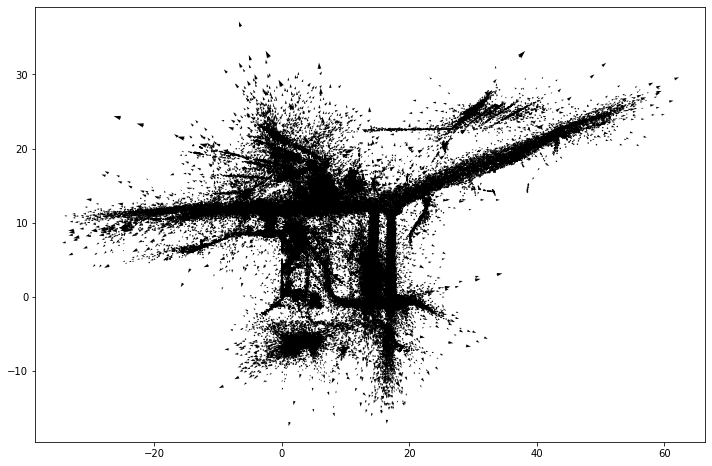

In [78]:
plt.figure(figsize=(12,8))
plt.quiver(x,y,u,v)